In [33]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets


from matplotlib import pyplot as plt

In [34]:
df = pd.read_csv('./insurance.csv')

print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
df['sex'].replace( 'female', 0,inplace=True)
df['sex'].replace('male', 1,inplace=True)

df['smoker'].replace( 'no', 0,inplace=True)
df['smoker'].replace('yes', 1,inplace=True)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [53]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


use charges column as dependent variable

/tmp/ipykernel_7343/3228545562.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


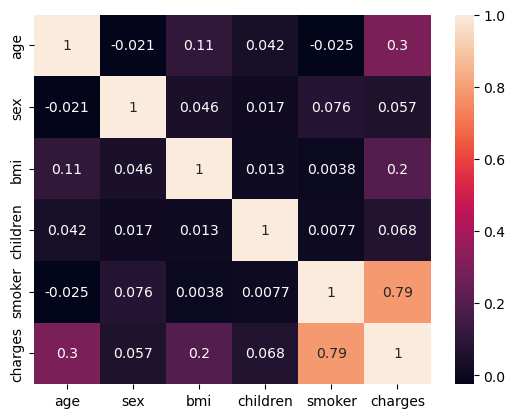

In [48]:
# correlation plot
corr = df.corr()
sns.heatmap(corr, annot= True);

Highest correlation is with smoking status, age, and bmi

Text(0.5, 1.0, 'Distribution of insurance charges')

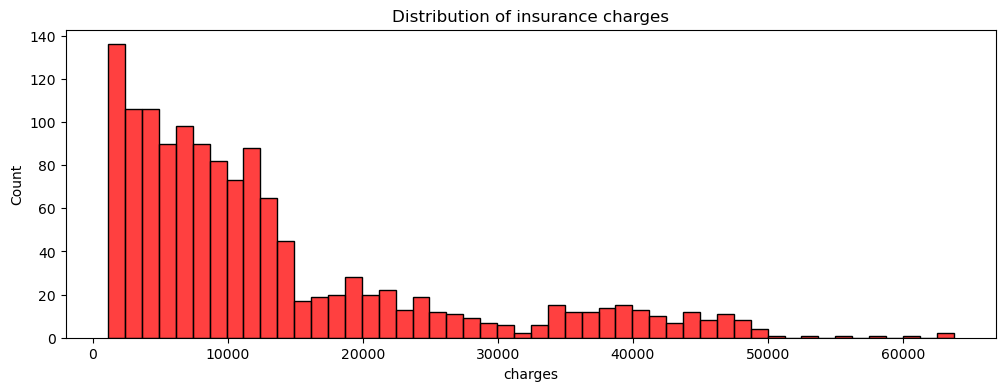

In [54]:
fig= plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)
sns.histplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

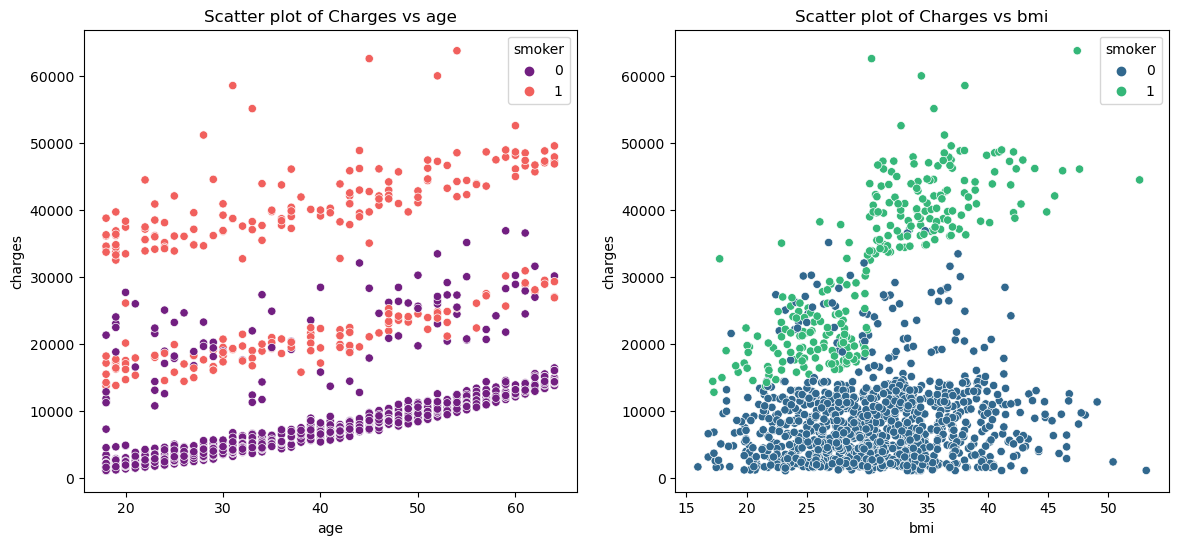

In [55]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

positive correlation between age and insurance charge

# Clean up data

In [36]:
X = df.drop('charges', axis=1)
X = df.drop('region', axis=1)
y = df['charges']


Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.25
)

print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(1003, 6)
(1003,)
(335, 6)
(335,)


# Linear Regression


## Linear Regression


In [37]:

def train_regression(X, y):
    # Initialize regressor
    regressor = LinearRegression()
    # Fit model
    model = regressor.fit(X, y)
    # Get performance score
    r2 = model.score(X, y)

    print("R-squared: %.3f" % r2)
    print(f"Model weights: {model.coef_}")
    print(f"Model bias: {model.intercept_}")

    return model

In [57]:
model = train_regression(Xtrain, ytrain)
# model, transformer = train_poly_regression(Xtrain, ytrain)
ypred = model.predict(Xtest)
r2 = r2_score(ytest, ypred)
print("Test R-squared: %.3f" % (r2))

R-squared: 1.000
Model weights: [-7.10646219e-15 -2.26130540e-12  1.23544885e-13  1.79163575e-13
  7.69014932e-12  1.00000000e+00]
Model bias: 0.0
Test R-squared: 1.000


## Polynomial Transformation

In [76]:
def train_poly_regression(X, y, degree):
    # Init polynomial transformer
    transformer = PolynomialFeatures(degree=degree, include_bias=True)
    
    # Fit transformer and create new input array with polynomial features
    X_poly = transformer.fit_transform(X)
    # Init linear regressor
    regressor = LinearRegression()
    model = regressor.fit(X_poly, y)
    # Get R-squared
    r2 = model.score(X_poly, y)
    print("R-squared: %.3f" % r2)
    # print(f"Model weights: {model.coef_}")
    print(f"Model bias: {model.intercept_}")

    return model, transformer

for i in list(range(0,5)):
    print(f'DEGREE {i}:')
    model, transformer = train_poly_regression(Xtrain, ytrain, i)
    Xtest_poly = transformer.fit_transform(Xtest)
    ypred = model.predict(Xtest_poly)
    r2 = r2_score(ytest, ypred)
    print("Test R-squared: %.3f" % (r2))
    print()

DEGREE 0:
R-squared: 0.000
Model bias: 13352.90249054736
Test R-squared: -0.001

DEGREE 1:
R-squared: 1.000
Model bias: 0.0
Test R-squared: 1.000

DEGREE 2:
R-squared: 1.000
Model bias: -4.820594767807052e-07
Test R-squared: 1.000

DEGREE 3:
R-squared: 1.000
Model bias: -0.0035217402491980465
Test R-squared: 1.000

DEGREE 4:
R-squared: 1.000
Model bias: 708.0059369240553
Test R-squared: 0.999



In [78]:

for i in list(range(5,10)):
    print(f'DEGREE {i}:')
    model, transformer = train_poly_regression(Xtrain, ytrain, i)
    Xtest_poly = transformer.fit_transform(Xtest)
    ypred = model.predict(Xtest_poly)
    r2 = r2_score(ytest, ypred)
    print("Test R-squared: %.3f" % (r2))
    print()

DEGREE 5:
R-squared: 0.996
Model bias: 1703.9085127915569
Test R-squared: 0.990

DEGREE 6:
R-squared: 0.988
Model bias: 3399.417476859726
Test R-squared: -0.918

DEGREE 7:
R-squared: 0.975
Model bias: 4499.791041683082
Test R-squared: -5.453

DEGREE 8:
R-squared: 0.936
Model bias: 5847.142256969088
Test R-squared: -213.230

DEGREE 9:
R-squared: 0.915
Model bias: 6859.252464047659
Test R-squared: -1076.961



Degree 5 has greatest score